In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
data = "iris-data_with_nans.csv"
df = pd.read_csv(data)

In [180]:
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


### Drop unnecessary columns

In [182]:
df.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [183]:
df.drop(labels=(df.columns[0]), axis=1,inplace=True)

In [184]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,170.0,84.500000,49.218899,0.0,42.25,84.5,126.75,169.0
SepalLengthCm,167.0,5.826347,0.827189,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,169.0,3.072781,0.447578,2.0,2.80,3.0,3.40,4.4
PetalLengthCm,166.0,3.707229,1.789382,1.0,1.50,4.3,5.10,6.9
PetalWidthCm,168.0,1.180357,0.765049,0.1,0.30,1.3,1.80,2.5


In [186]:
df.groupby("Species").agg(["min","max","mean"])

Id             SepalLengthCm                SepalWidthCm  \
                 min  max   mean           min  max      mean          min   
Species                                                                      
Iris-setosa        0   59   29.5           4.3  6.9  5.034483          2.3   
Iris-versicolor   60  113   86.5           4.9  7.0  5.932075          2.0   
Iris-virginica   114  169  141.5           4.9  7.9  6.546429          2.2   

                               PetalLengthCm                PetalWidthCm       \
                 max      mean           min  max      mean          min  max   
Species                                                                         
Iris-setosa      4.4  3.389831           1.0  5.4  1.572414          0.1  2.1   
Iris-versicolor  4.4  2.805556           1.5  5.1  4.190385          0.4  1.8   
Iris-virginica   3.9  2.996429           1.3  6.9  5.469643          0.4  2.5   

                           
                     mean  
Species                    
Iris-setosa      0.300000  
Iris-versicolor  1.314815  
Iris-virginica   1.992727

In [187]:
df.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [188]:
for column in df.columns[1:-1]:
    df[column].fillna(value=df[column].mean(),inplace=True)

In [189]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [190]:
df.dropna(axis=0,how="any",inplace=True)

In [191]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


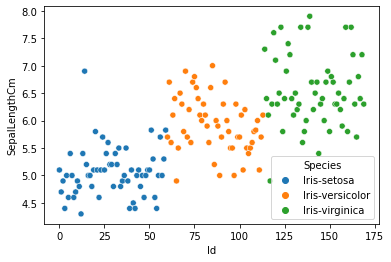

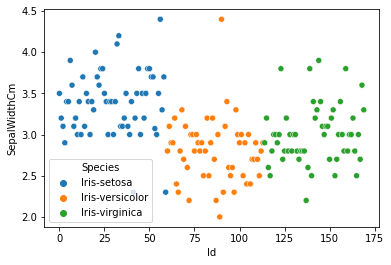

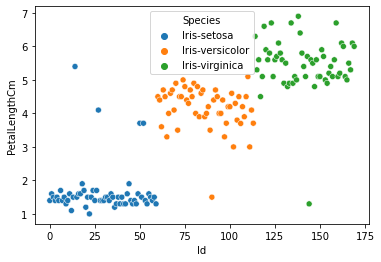

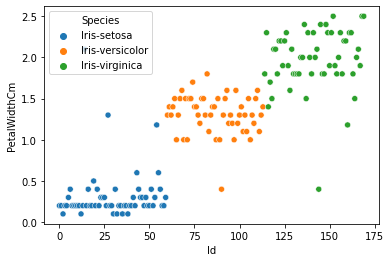

In [192]:
for column in df.columns[1:-1]:
    sns.scatterplot(data = df,x="Id",y=column,hue="Species");
    plt.show()

### Outlier Detection

#### 3 sigma

In [193]:
selected_spec = df[df["Species"] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [194]:
std = selected_column.std()
avg = selected_column.mean()

In [195]:
three_sigma_plus = avg + (3*std)
three_sigma_minus = avg - (3*std)

In [196]:
three_sigma_plus,three_sigma_minus

(6.397012123414941, 3.7247443636110074)

In [197]:
selected_column[((selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus))].index

Int64Index([14], dtype='int64')

In [198]:
def three_sigma():
    for column in df.columns[1:-1]:
        for spec in df["Species"].unique():
            selected_spec = df[df["Species"] == spec]
            selected_column = selected_spec[column]

            std = selected_column.std()
            avg = selected_column.mean()

            three_sigma_plus = avg + (3*std)
            three_sigma_minus = avg - (3*std)

            outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
            df.drop(index=outliers,inplace=True)
            print(column, spec, outliers)

In [199]:
three_sigma();

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


In [200]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 169
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             163 non-null    int64  
 1   SepalLengthCm  163 non-null    float64
 2   SepalWidthCm   163 non-null    float64
 3   PetalLengthCm  163 non-null    float64
 4   PetalWidthCm   163 non-null    float64
 5   Species        163 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.9+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### IQR - Outlier

In [201]:
def iqr_Outlier():
    for column in df.columns[1:-1]:
        for spec in df["Species"].unique():
            selected_spec = df[df["Species"] == spec]
            selected_column = selected_spec[column]

            q1 = selected_column.quantile(0.25)
            q3 = selected_column.quantile(0.75)

            iqr = q3-q1
            iqr_min = q1 - (1.5*iqr)
            iqr_max = q3 + (1.5*iqr)

            print(column,spec,"| min=",iqr_min,"max=",iqr_max)

            max_idxs = df[(df["Species"] == spec) & (df[column] > iqr_max)].index        
            print(max_idxs)        
            min_idxs = df[(df["Species"] == spec) & (df[column] < iqr_min)].index
            print(min_idxs)

            df.drop(index = max_idxs, inplace=True)
            df.drop(index=min_idxs,inplace=True)

In [202]:
iqr_Outlier()

SepalLengthCm Iris-setosa | min= 4.199999999999999 max= 5.800000000000001
Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor | min= 4.549999999999999 max= 7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica | min= 5.15 max= 7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa | min= 2.35 max= 4.35
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
SepalWidthCm Iris-versicolor | min= 1.75 max= 3.75
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica | min= 2.1999999999999993 max= 3.8000000000000007
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa | min= 1.0999999999999996 max= 1.9000000000000004
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor | min= 2.8500000000000005 max= 5.6499999999999995
Int64Index([], dtype='int64')


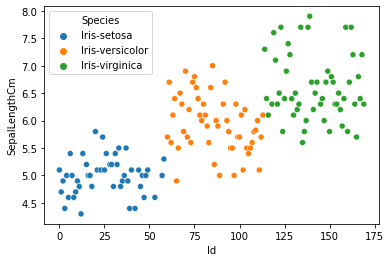

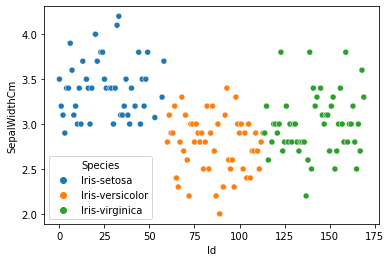

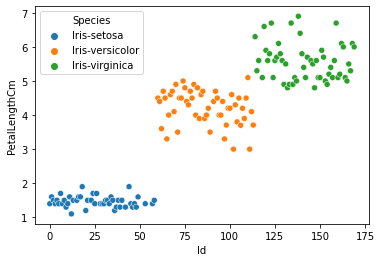

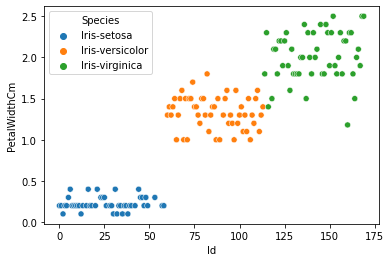

In [203]:
for column in df.columns[1:-1]:
    sns.scatterplot(data = df,x="Id",y=column,hue="Species");
    plt.show()

In [204]:
df_final = df

In [205]:
df_final.to_csv("df_final")

### Label Encoding
####  we have to transform the categorical values ​​before giving them to the model.

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
data = pd.read_csv("df_final.csv")

In [208]:
data

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...,...
149,165,165,5.7,2.5,5.0,2.0,Iris-virginica
150,166,166,6.8,3.0,5.5,2.1,Iris-virginica
151,167,167,6.4,2.7,5.3,1.9,Iris-virginica
152,168,168,7.2,3.6,6.1,2.5,Iris-virginica


In [209]:
data.drop(["Unnamed: 0","Id"],axis=1,inplace=True)

In [210]:
le = LabelEncoder()

In [211]:
data["Species"] = le.fit_transform(data["Species"])

In [212]:
data["Species"].unique()

array([0, 1, 2])

### Data controls

In [213]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [214]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [215]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


### Train_test_split

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2)

In [218]:
y_train.value_counts()

1    47
2    40
0    36
Name: Species, dtype: int64

In [219]:
y_test.value_counts()

2    14
0    11
1     6
Name: Species, dtype: int64

### Creating the model

In [231]:
import xgboost as xgb

In [232]:
xgb_cls = xgb.XGBClassifier(objective="multiclass:softmax",num_class=4)

In [233]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [234]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
43,5.1,3.8,1.6,0.200000
92,5.5,2.4,3.7,1.000000
103,6.3,2.8,5.1,1.500000
127,6.5,3.2,5.1,2.000000
97,5.1,2.5,3.0,1.100000
19,5.1,3.7,1.5,0.400000
1,4.7,3.2,1.6,0.200000
29,5.5,4.2,1.4,0.200000
149,5.7,2.5,5.0,2.000000
114,6.4,2.8,5.6,2.100000


In [235]:
preds = xgb_cls.predict(X_test)

In [236]:
preds

array([0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 1, 2, 0, 2], dtype=int64)

In [237]:
np.array(y_test)

array([0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 1, 2, 0, 2])

In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [239]:
accuracy_score(y_test,preds)

1.0

In [240]:
confusion_matrix(y_test,preds)

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 14]], dtype=int64)

In [241]:
x_new = pd.array([[3,2,4,0.2]]),
x_new

(<PandasArray>
 [[3, 2, 4, 0.2]]
 Length: 1, dtype: object,)